<a href="https://colab.research.google.com/github/sushantkumar-estech/Classification-of-MNIST-like-datatset-for-Kannada-handwritten-digits/blob/master/Kannadda_MNIST_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu==2.0.0.alpha0

In [40]:
#https://www.kaggle.com/bustam/cnn-in-keras-for-kannada-digits

In [1]:
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [3]:
tf.__version__

'1.15.2'

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
train = pd.read_csv('/content/drive/My Drive/ML_Dataset/MNIST_Kannada/train.csv')
test = pd.read_csv('/content/drive/My Drive/ML_Dataset/MNIST_Kannada/test.csv')
Dig_MNIST = pd.read_csv('/content/drive/My Drive/ML_Dataset/MNIST_Kannada/Dig-MNIST.csv')

In [7]:
sample_sub = pd.read_csv('/content/drive/My Drive/ML_Dataset/MNIST_Kannada/sample_submission.csv')

In [8]:
print(train.shape)
print(test.shape)
print(Dig_MNIST.shape)

(60000, 785)
(5000, 785)
(10240, 785)


In [9]:
X=train.iloc[:,1:].values 
Y=train.iloc[:,0].values 
Y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
X = X.reshape(X.shape[0], 28, 28,1) 
print(X.shape)

(60000, 28, 28, 1)


In [11]:
Y = keras.utils.to_categorical(Y, 10) 
print(Y.shape)

(60000, 10)


In [12]:
x_test=test.drop('id', axis=1).iloc[:,:].values
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_test.shape

(5000, 28, 28, 1)

In [13]:
x_dig=Dig_MNIST.drop('label',axis=1).iloc[:,:].values
print(x_dig.shape)
x_dig = x_dig.reshape(x_dig.shape[0], 28, 28,1)
x_dig.shape

(10240, 784)


(10240, 28, 28, 1)

In [14]:
y_dig=Dig_MNIST.label
y_dig.shape

(10240,)

In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.10, random_state=42) 

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.25,
                                   horizontal_flip = False)

In [17]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
def lr_decay(epoch):#lrv
    return initial_learningrate * 0.99 ** epoch

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_______________________________________________________

In [20]:
initial_learningrate=2e-3
batch_size = 1024
epochs = 50
input_shape = (28, 28, 1)

In [21]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

In [22]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=initial_learningrate),
              metrics=['accuracy'])


In [23]:
from sklearn import metrics


In [24]:
history = model.fit_generator(
      train_datagen.flow(X_train,Y_train, batch_size=batch_size),
      steps_per_epoch=100,
      epochs=epochs,
      callbacks=[LearningRateScheduler(lr_decay),
                 es
               ],
      validation_data=valid_datagen.flow(X_valid,Y_valid),
      validation_steps=50,  
      verbose=2)

Epoch 1/50
Epoch 1/50
100/100 - 42s - loss: 0.5498 - acc: 0.8167 - val_loss: 0.9210 - val_acc: 0.9775
Epoch 2/50
Epoch 1/50
100/100 - 31s - loss: 0.0938 - acc: 0.9697 - val_loss: 1.7666 - val_acc: 0.7044
Epoch 3/50
Epoch 1/50
100/100 - 31s - loss: 0.0661 - acc: 0.9786 - val_loss: 0.0448 - val_acc: 0.9912
Epoch 4/50
Epoch 1/50
100/100 - 32s - loss: 0.0518 - acc: 0.9830 - val_loss: 0.0242 - val_acc: 0.9912
Epoch 5/50
Epoch 1/50
100/100 - 31s - loss: 0.0454 - acc: 0.9848 - val_loss: 0.0771 - val_acc: 0.9756
Epoch 6/50
Epoch 1/50
100/100 - 31s - loss: 0.0417 - acc: 0.9866 - val_loss: 0.0138 - val_acc: 0.9956
Epoch 7/50
Epoch 1/50
100/100 - 31s - loss: 0.0376 - acc: 0.9876 - val_loss: 0.0103 - val_acc: 0.9956
Epoch 8/50
Epoch 1/50
100/100 - 31s - loss: 0.0344 - acc: 0.9886 - val_loss: 0.0144 - val_acc: 0.9950
Epoch 9/50
Epoch 1/50
100/100 - 31s - loss: 0.0329 - acc: 0.9894 - val_loss: 0.0136 - val_acc: 0.9950
Epoch 10/50
Epoch 1/50
100/100 - 31s - loss: 0.0323 - acc: 0.9892 - val_loss: 0.01

In [25]:
preds_dig=model.predict_classes(x_dig/255)
metrics.accuracy_score(preds_dig, y_dig)

0.90537109375

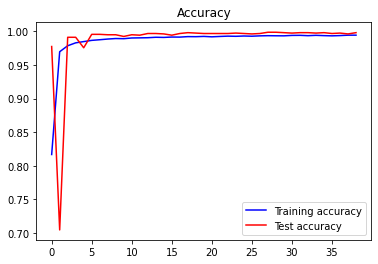

In [26]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Test accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

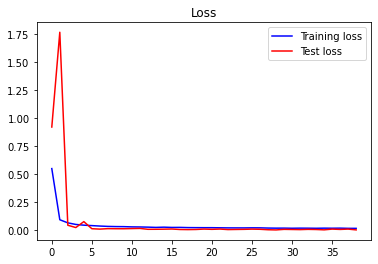

In [27]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Loss')
plt.legend()
plt.show()

In [28]:
#Let's fit the model on the whole training set.

In [29]:
keras.backend.clear_session()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
initial_learningrate=2e-3
batch_size = 1024
epochs = 50
input_shape = (28, 28, 1)

In [32]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(lr=initial_learningrate),
              metrics=['accuracy'])

In [33]:
history = model.fit_generator(
      train_datagen.flow(X,Y, batch_size=batch_size),
      steps_per_epoch=100,
      epochs=epochs,
      callbacks=[LearningRateScheduler(lr_decay)           
               ],
      validation_data=valid_datagen.flow(X_valid,Y_valid),
      validation_steps=50,  
      verbose=2)

Epoch 1/50
Epoch 1/50
100/100 - 34s - loss: 0.5628 - acc: 0.8118 - val_loss: 0.8756 - val_acc: 0.9700
Epoch 2/50
Epoch 1/50
100/100 - 31s - loss: 0.0910 - acc: 0.9701 - val_loss: 0.1193 - val_acc: 0.9956
Epoch 3/50
Epoch 1/50
100/100 - 31s - loss: 0.0631 - acc: 0.9795 - val_loss: 0.0250 - val_acc: 0.9937
Epoch 4/50
Epoch 1/50
100/100 - 31s - loss: 0.0525 - acc: 0.9828 - val_loss: 0.0878 - val_acc: 0.9712
Epoch 5/50
Epoch 1/50
100/100 - 31s - loss: 0.0441 - acc: 0.9853 - val_loss: 0.0085 - val_acc: 0.9962
Epoch 6/50
Epoch 1/50
100/100 - 31s - loss: 0.0428 - acc: 0.9863 - val_loss: 0.0073 - val_acc: 0.9981
Epoch 7/50
Epoch 1/50
100/100 - 31s - loss: 0.0366 - acc: 0.9879 - val_loss: 0.0313 - val_acc: 0.9906
Epoch 8/50
Epoch 1/50
100/100 - 31s - loss: 0.0366 - acc: 0.9880 - val_loss: 0.0513 - val_acc: 0.9887
Epoch 9/50
Epoch 1/50
100/100 - 31s - loss: 0.0346 - acc: 0.9886 - val_loss: 0.0091 - val_acc: 0.9969
Epoch 10/50
Epoch 1/50
100/100 - 31s - loss: 0.0313 - acc: 0.9897 - val_loss: 0.01

In [34]:
preds_dig=model.predict_classes(x_dig/255)
metrics.accuracy_score(preds_dig, y_dig)

0.9021484375

In [35]:
predictions = model.predict_classes(x_test/255.)

In [36]:
submission = pd.read_csv('/content/drive/My Drive/ML_Dataset/MNIST_Kannada/sample_submission.csv')

In [37]:
submission['label'] = predictions

In [38]:
submission.head()


,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [39]:
submission.to_csv("submission.csv",index=False)